# <font color=bluelight>**Road Traffic Severity Classification Prediction**<br>
<font color=4197EC>**Problem Statement:** </font><br>
The target feature is Accident_severitywhich is a multi-class variable. The
task is to classify this variable based on the other 31 features step-by-step by
going through each day's task. Your metric for evaluation will be f1-score

***********************

# <font color=49EBF3><strong> Essential Steps
- <strong> Import Library
- <strong> Load Data
- <strong> EDA
- <strong> Data Cleaning
- <strong> Prepocessing
- <strong> Model Building
- <strong> Evaluation
- <strong> Fine Tune Model For Improment Result


In [ ]:
!pip install sweetviz

# Essential Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif,SelectKBest,f_classif

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# import sweetviz as sv

In [2]:
data = pd.read_csv('/content/drive/MyDrive/miss_aq/project3/RTA Dataset.csv')

In [ ]:
data.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [ ]:
print(data.shape)
data.info()

(12316, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment    

### <strong> Checked the missing values

In [ ]:
data.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

### <strong> Checked the columns name

In [ ]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

# <strong>Changed column name to lowercase letter.

In [3]:
columns_lower = [col.lower() for col in data.columns]
data.columns = columns_lower
data = pd.DataFrame(data)
print(data.columns)

Index(['time', 'day_of_week', 'age_band_of_driver', 'sex_of_driver',
       'educational_level', 'vehicle_driver_relation', 'driving_experience',
       'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle',
       'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians',
       'road_allignment', 'types_of_junction', 'road_surface_type',
       'road_surface_conditions', 'light_conditions', 'weather_conditions',
       'type_of_collision', 'number_of_vehicles_involved',
       'number_of_casualties', 'vehicle_movement', 'casualty_class',
       'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement',
       'cause_of_accident', 'accident_severity'],
      dtype='object')


In [ ]:
data.accident_severity.unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

In [ ]:
data.nunique()

time                           1074
day_of_week                       7
age_band_of_driver                5
sex_of_driver                     3
educational_level                 7
vehicle_driver_relation           4
driving_experience                7
type_of_vehicle                  17
owner_of_vehicle                  4
service_year_of_vehicle           6
defect_of_vehicle                 3
area_accident_occured            14
lanes_or_medians                  7
road_allignment                   9
types_of_junction                 8
road_surface_type                 5
road_surface_conditions           4
light_conditions                  4
weather_conditions                9
type_of_collision                10
number_of_vehicles_involved       6
number_of_casualties              8
vehicle_movement                 13
casualty_class                    4
sex_of_casualty                   3
age_band_of_casualty              6
casualty_severity                 4
work_of_casuality           

In [ ]:
data.day_of_week.value_counts()

Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: day_of_week, dtype: int64

# **We used Bar Plot**

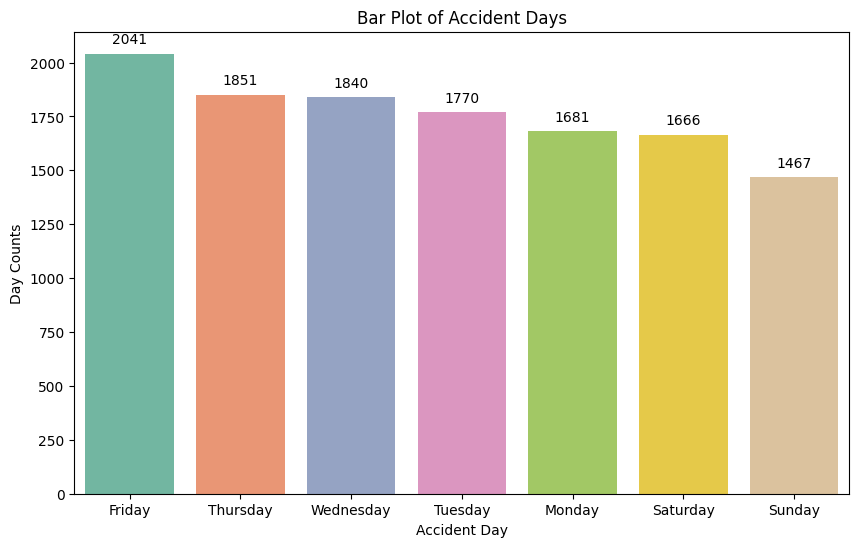

In [ ]:
# Unique values for 'Accident_severity'
day_counts = {
    'Friday': 2041,
    'Thursday': 1851,
    'Wednesday': 1840,
    'Tuesday': 1770,
    'Monday': 1681,
    'Saturday': 1666,
    'Sunday': 1467
}

# Convert dictionary to DataFrame
df = pd.DataFrame(list(day_counts.items()), columns=['Day', 'Count'])

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Day', y='Count', data=df, palette='Set2')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Bar Plot of Accident Days')
plt.xlabel('Accident Day')
plt.ylabel('Day Counts')
plt.show()


The accident Severity column is our target column. The accident Severity column is our target column. this has three unique values inside that show the three types of injury, Slight Injury, Serious Injury, and Fatal injury  

In [ ]:
data.accident_severity.value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: accident_severity, dtype: int64

In [ ]:
data.describe()

number_of_vehicles_involved  number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

In [ ]:
# RT_report = sv.analyze(data)
# RT_report.show_html()


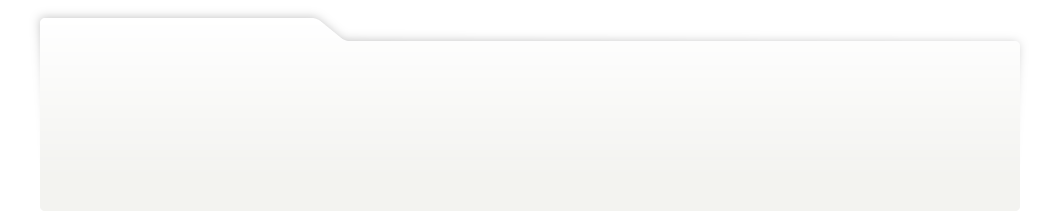
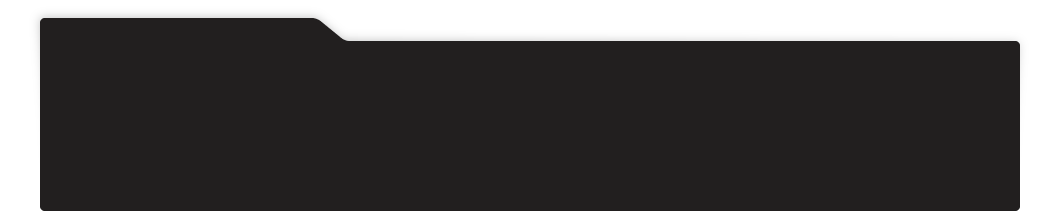
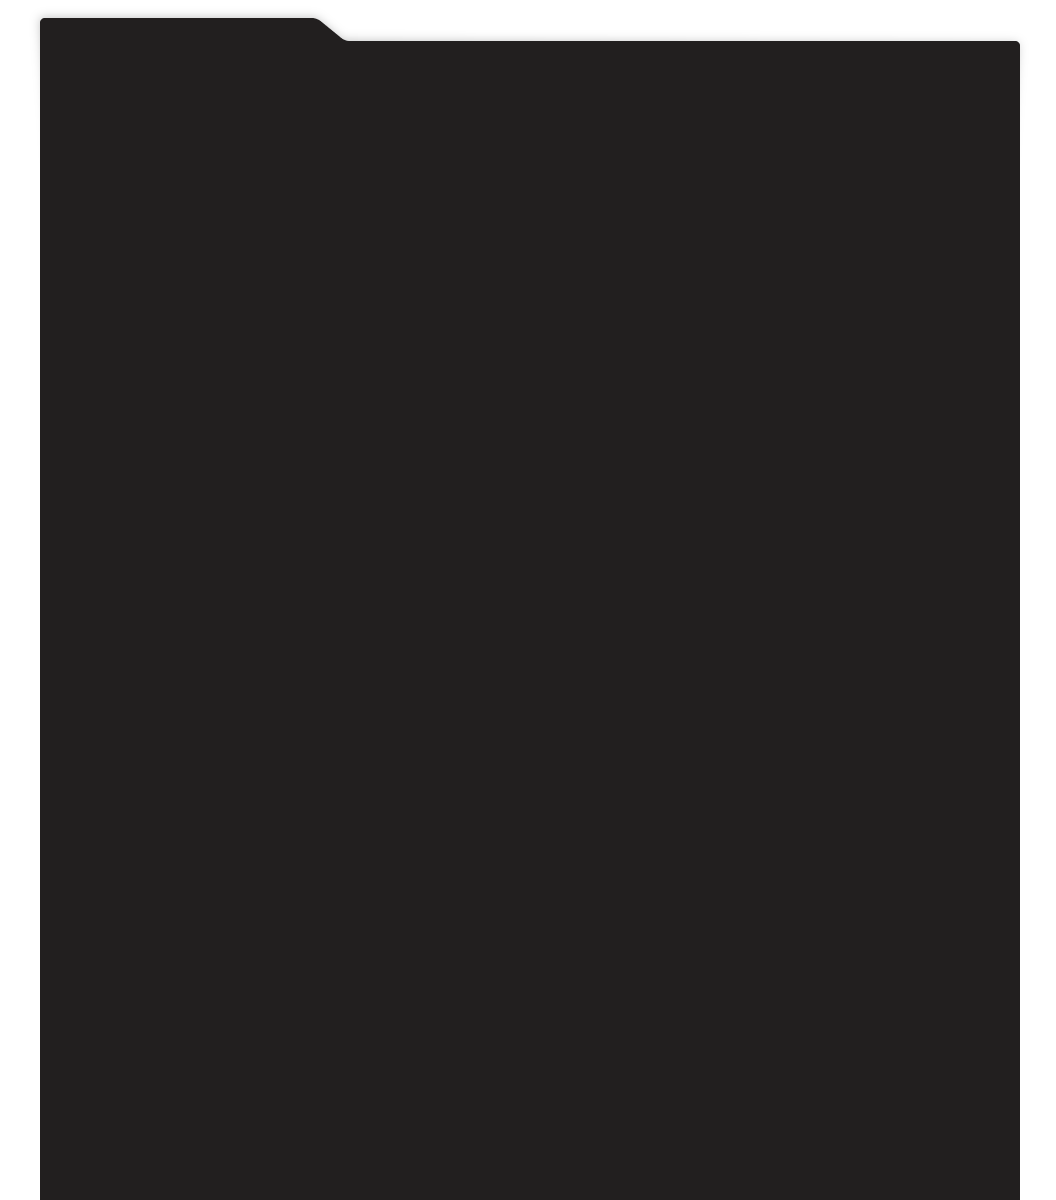
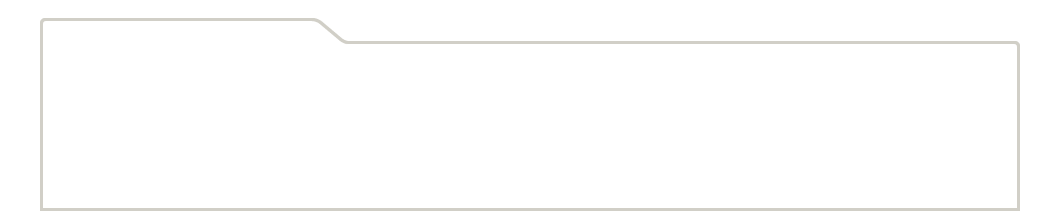
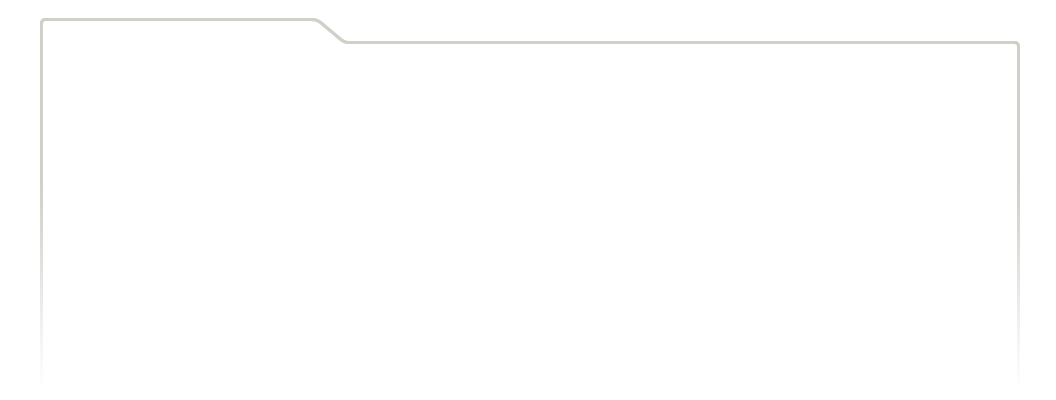
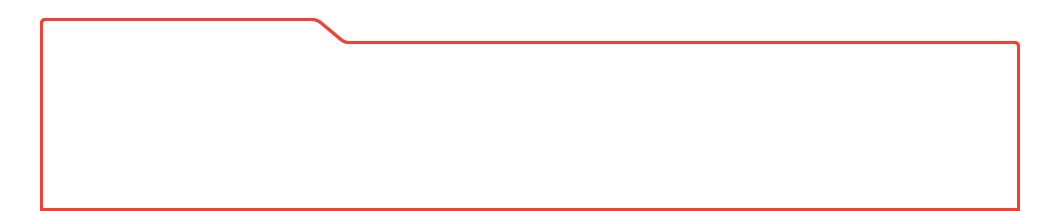
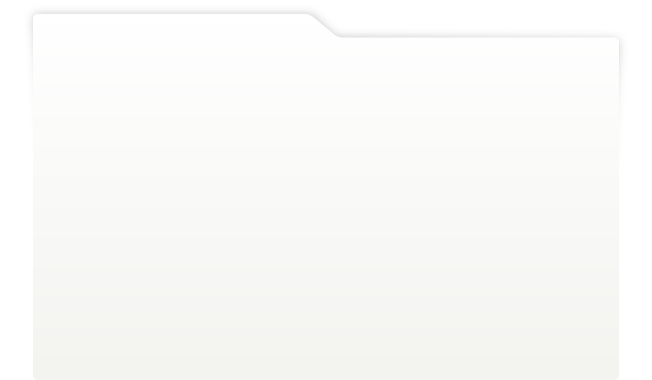
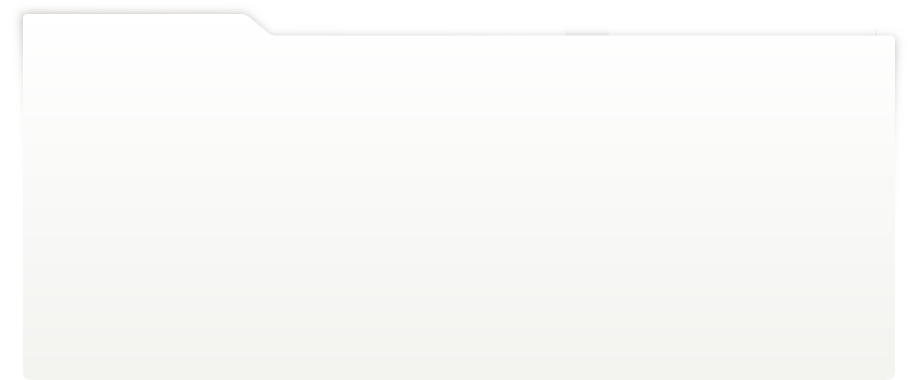
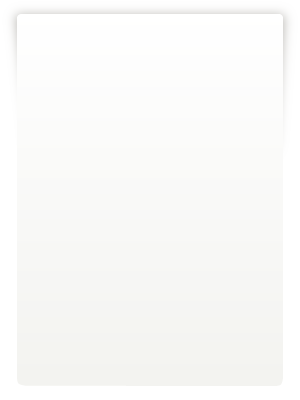
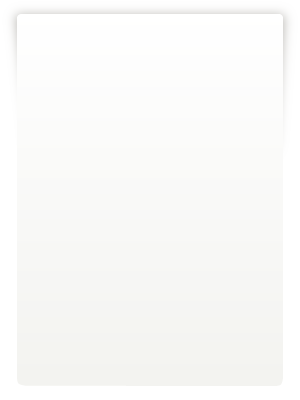
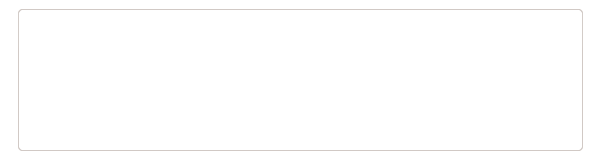
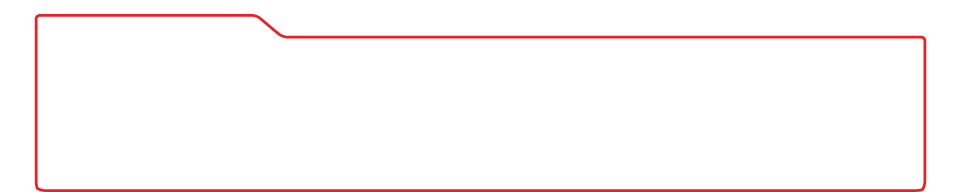
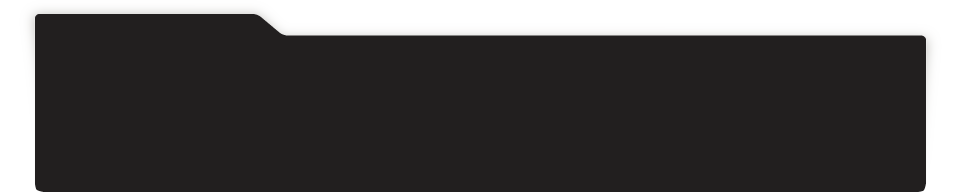
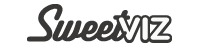
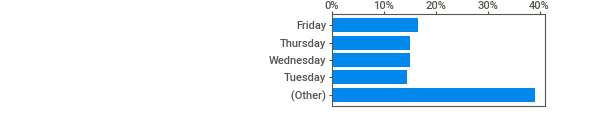
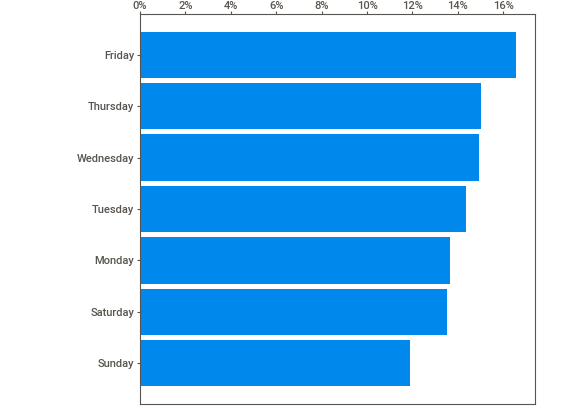
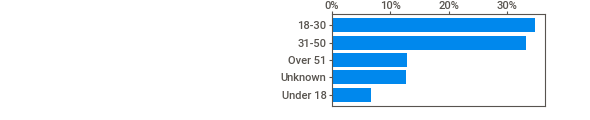
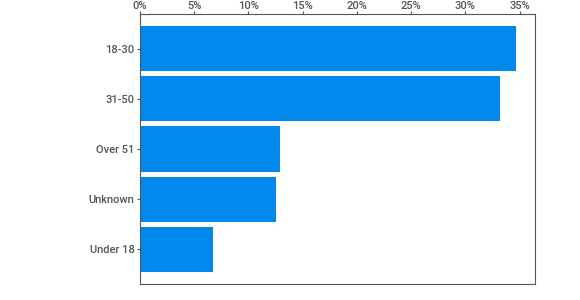
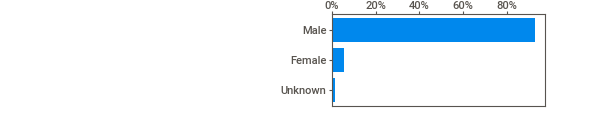
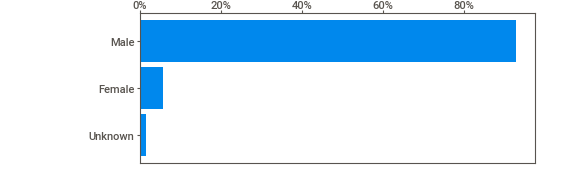
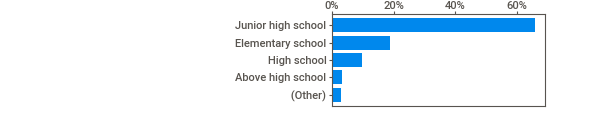
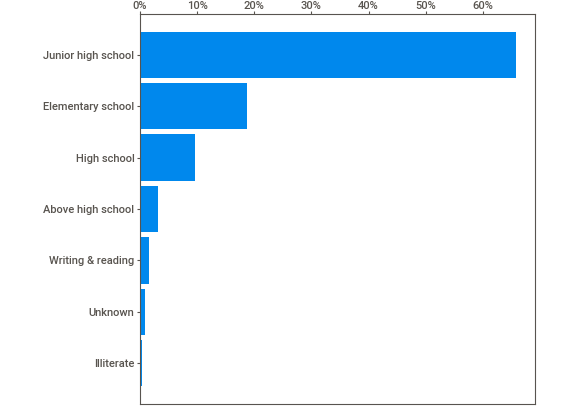
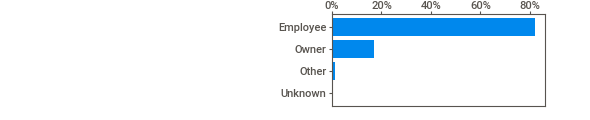
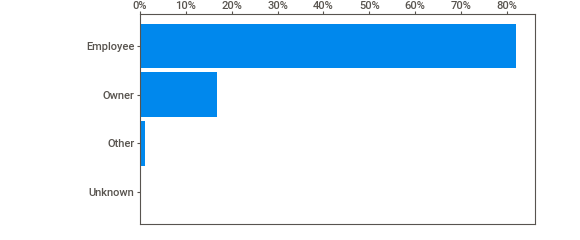
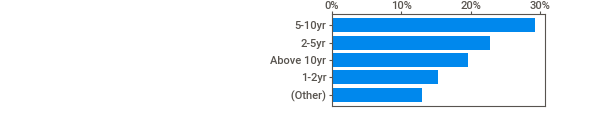
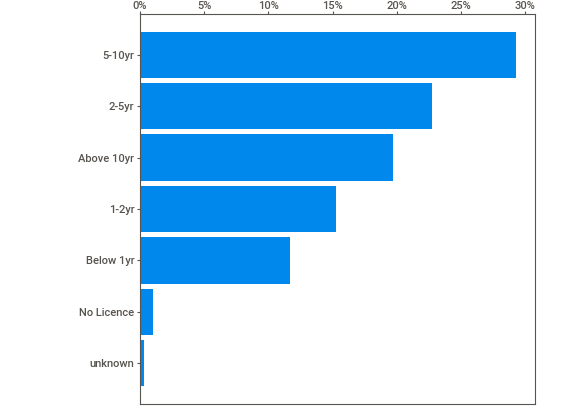
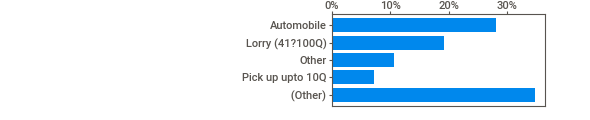
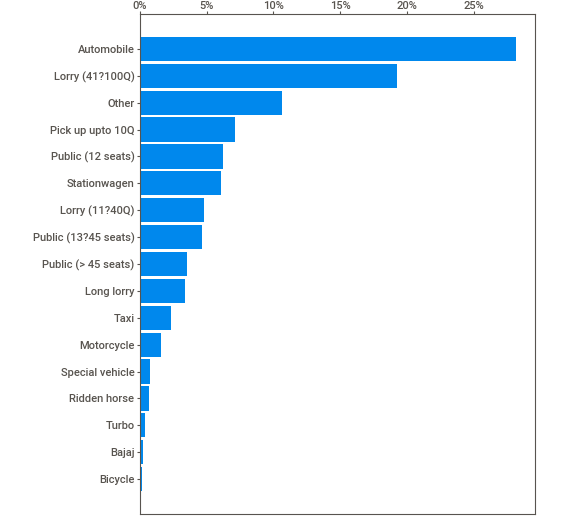
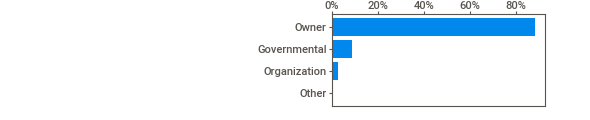
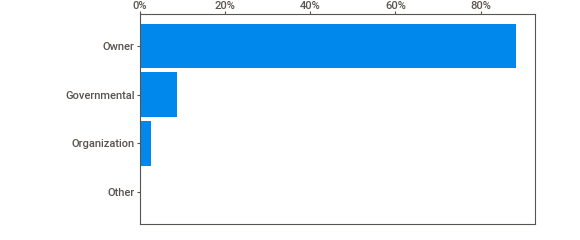
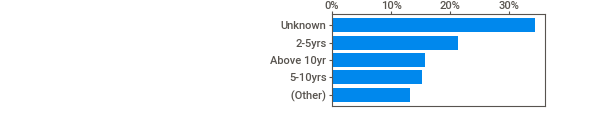
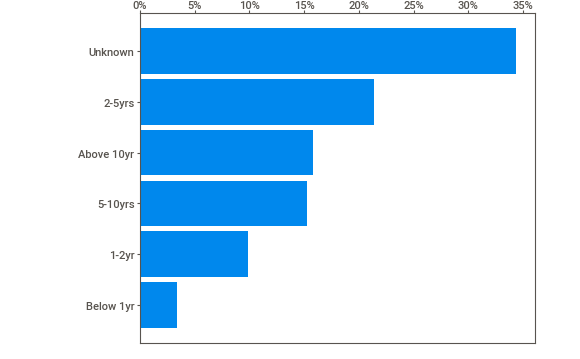
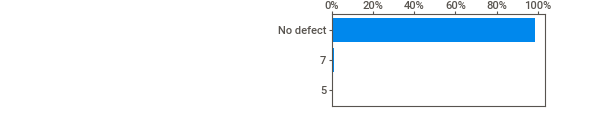
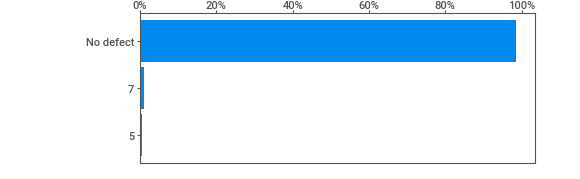
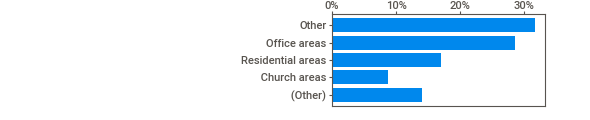
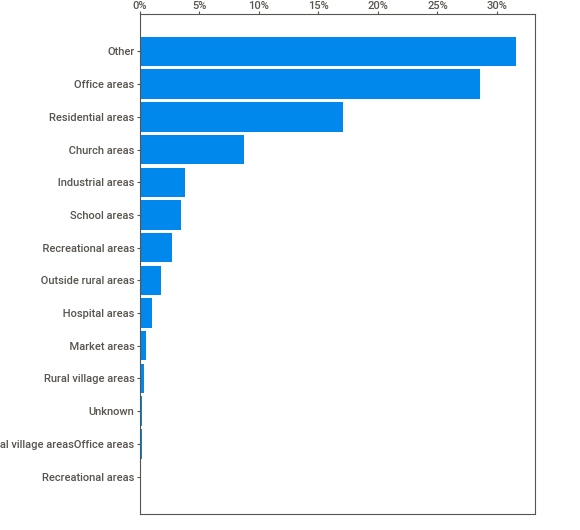
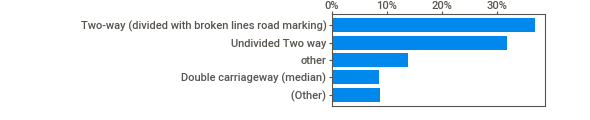
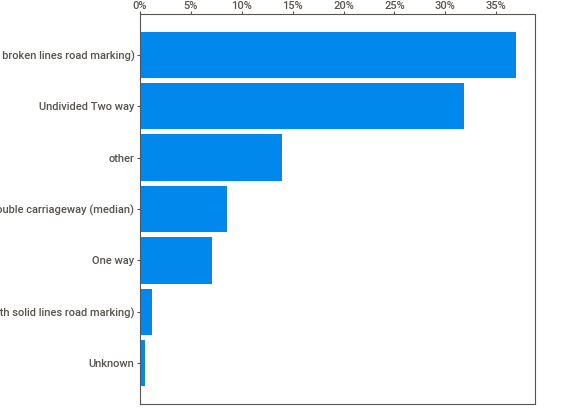
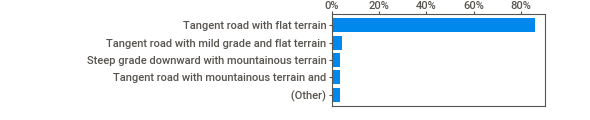
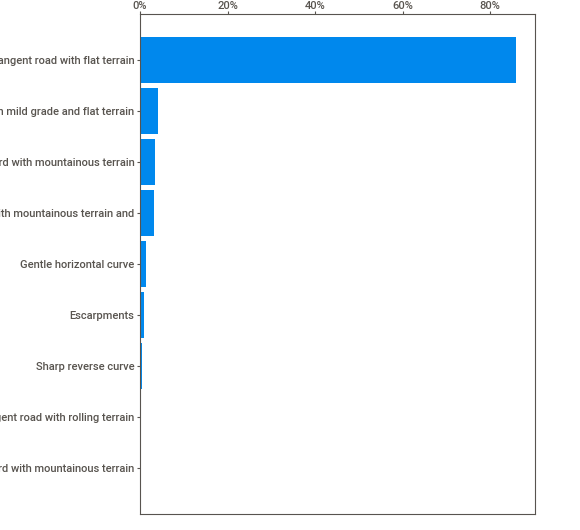
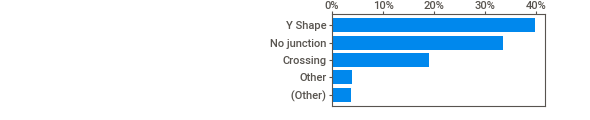
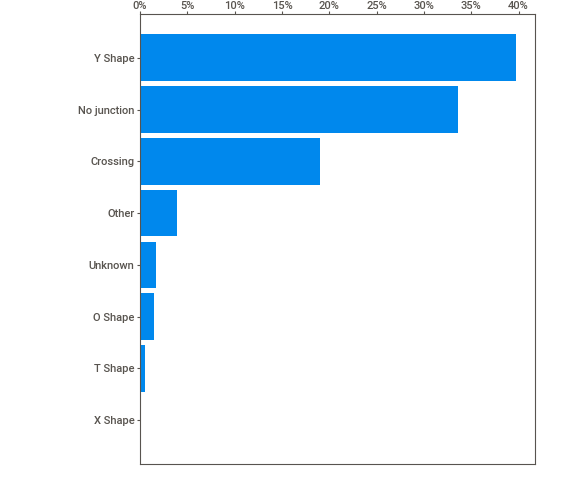
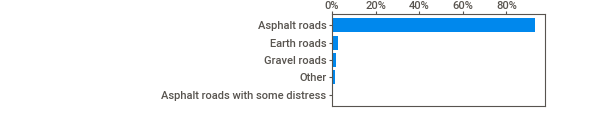
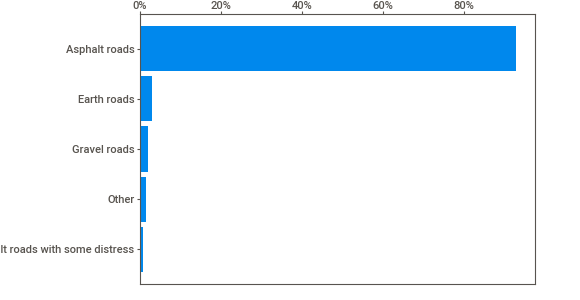
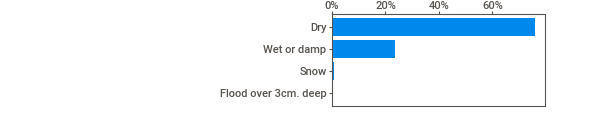
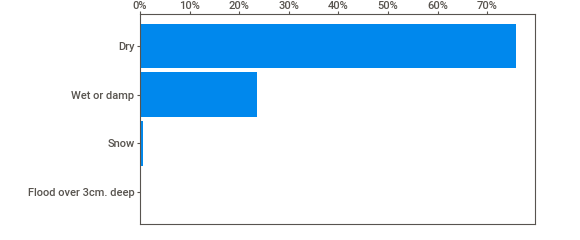
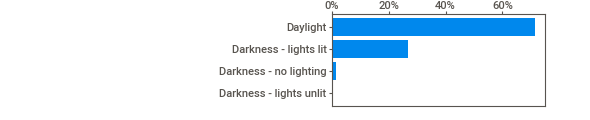
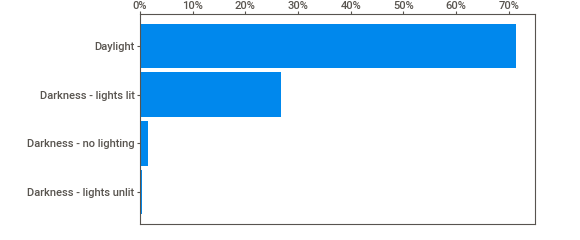
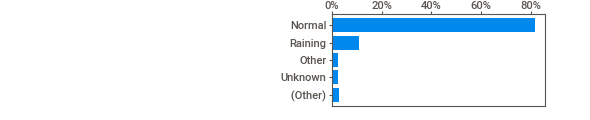
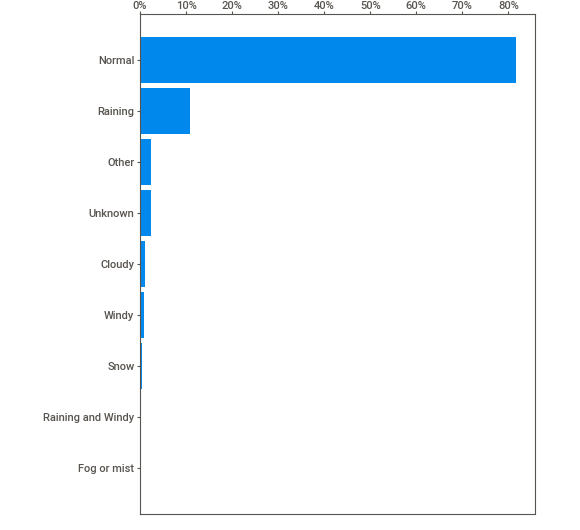
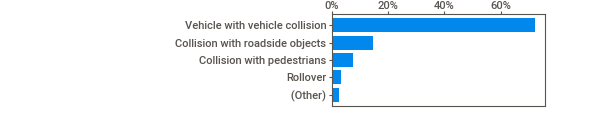
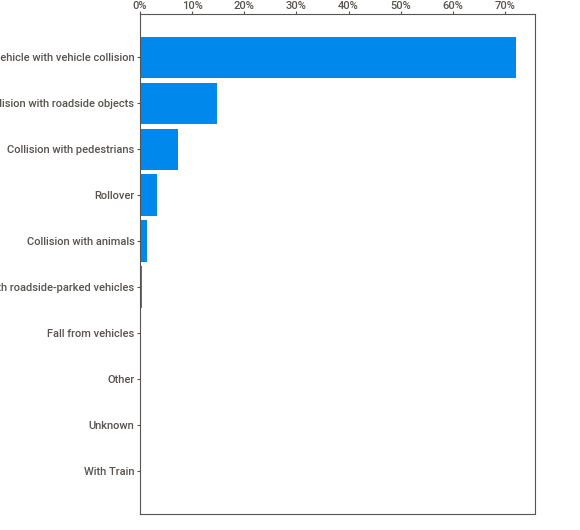
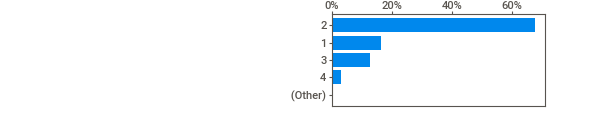
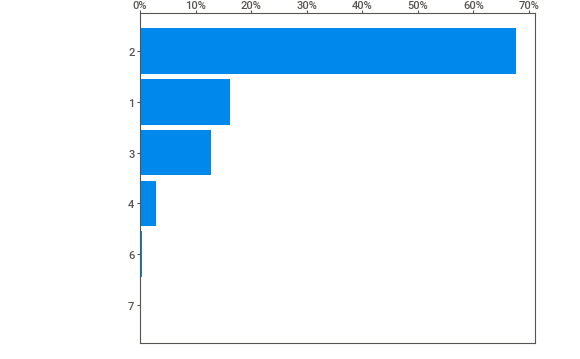
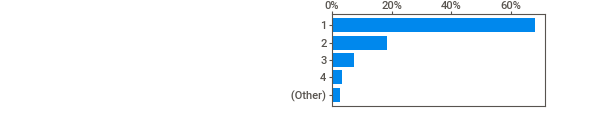
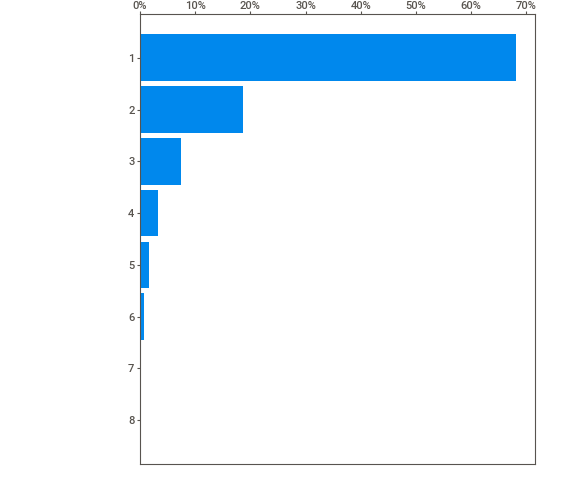
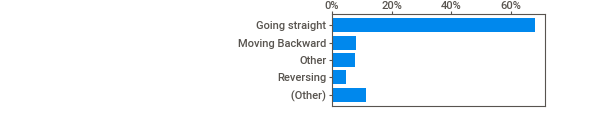
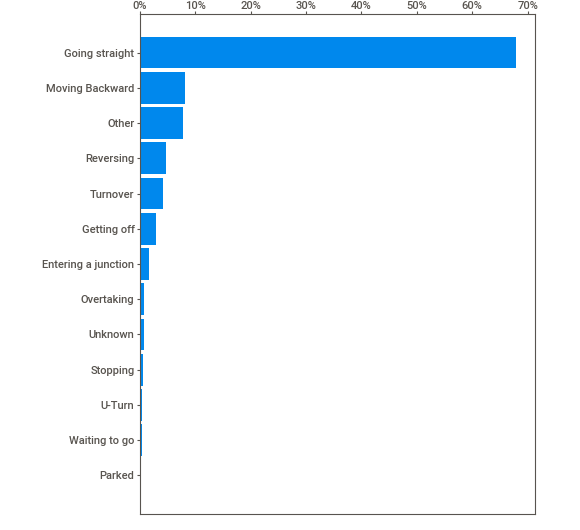
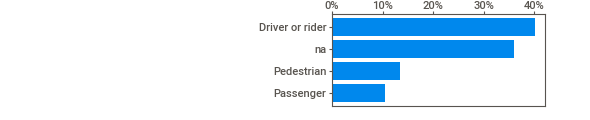
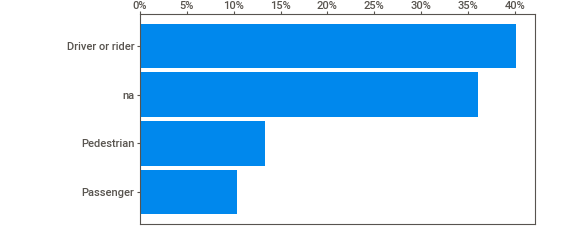
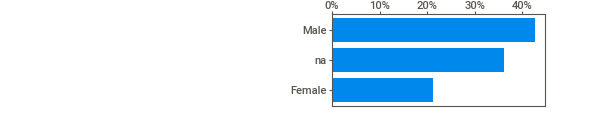
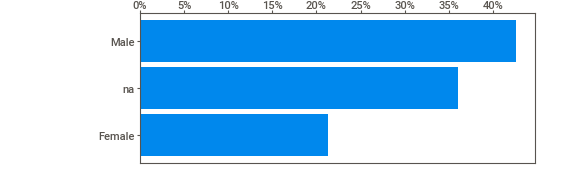
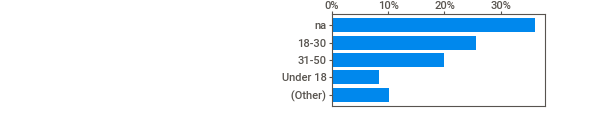
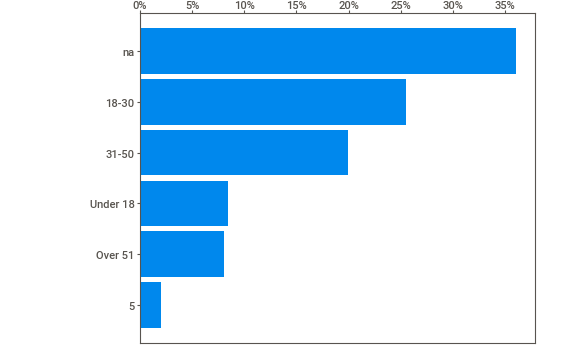
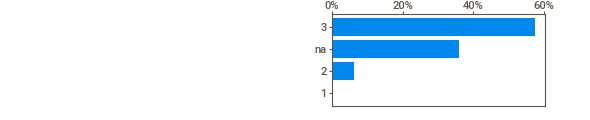
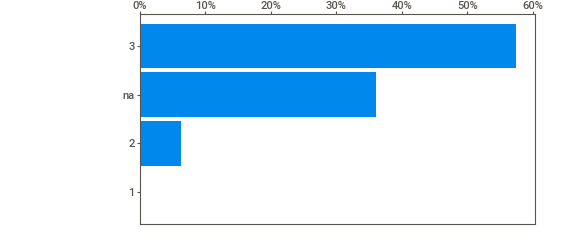
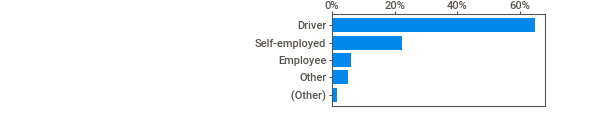
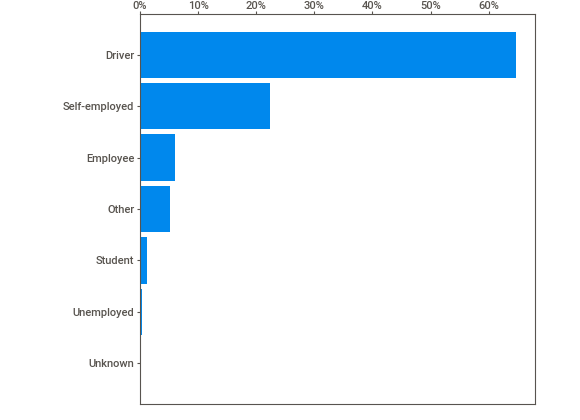
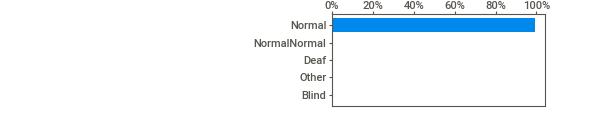
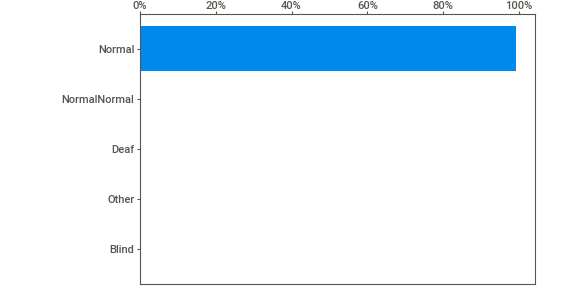
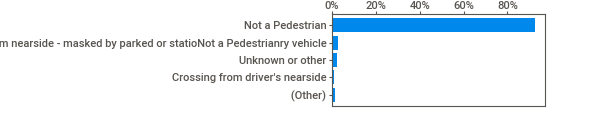
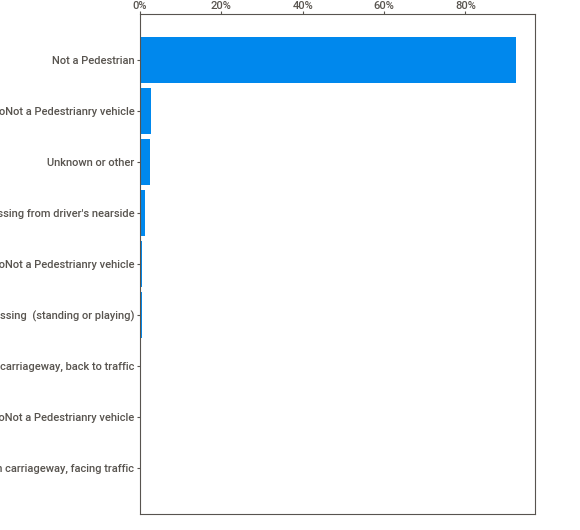
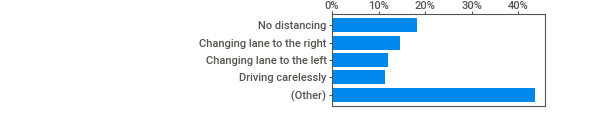
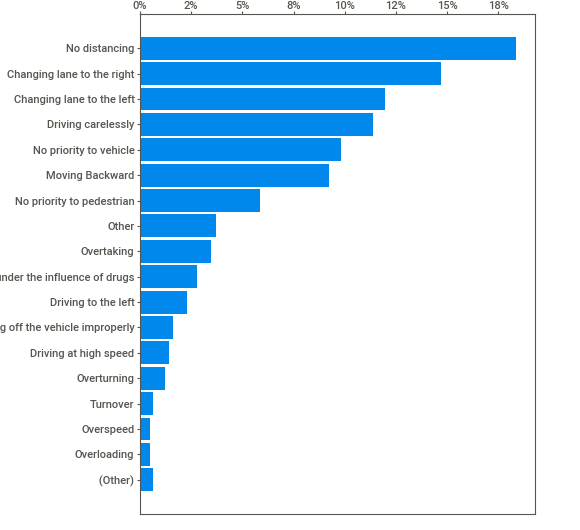
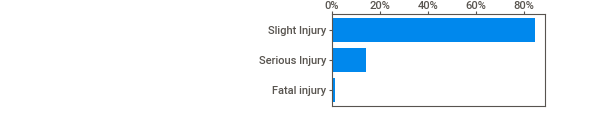
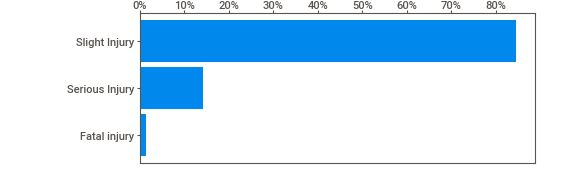
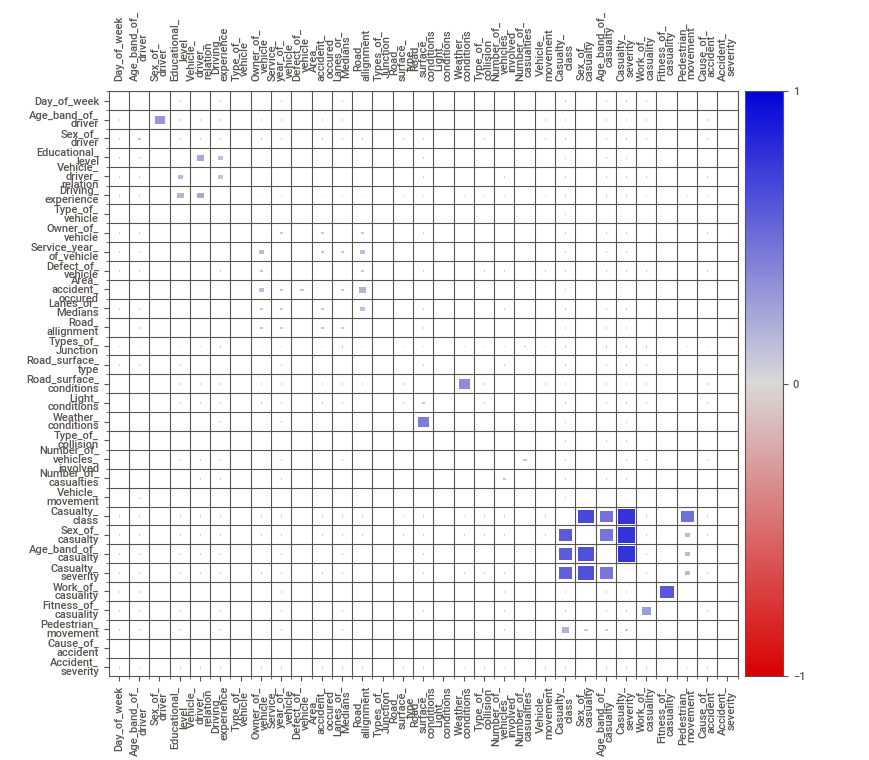
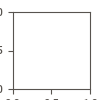

None


In [ ]:
# print(RT_report.show_notebook())

In [4]:
RTA_data = data

In [ ]:
print('Duplicates value', RTA_data.duplicated().sum())

Duplicates value 0


In [ ]:
# Convert the "time" to datatime
RTA_data['time'] = pd.to_datetime(RTA_data['time'])
# Hours
RTA_data['time'].dt.hour
# Extracting the hours and minute from timestamp
RTA_data['hour'] = RTA_data['time'].dt.hour
RTA_data['minute'] = RTA_data['time'].dt.minute
RTA_data.drop('time', axis=1, inplace=True)

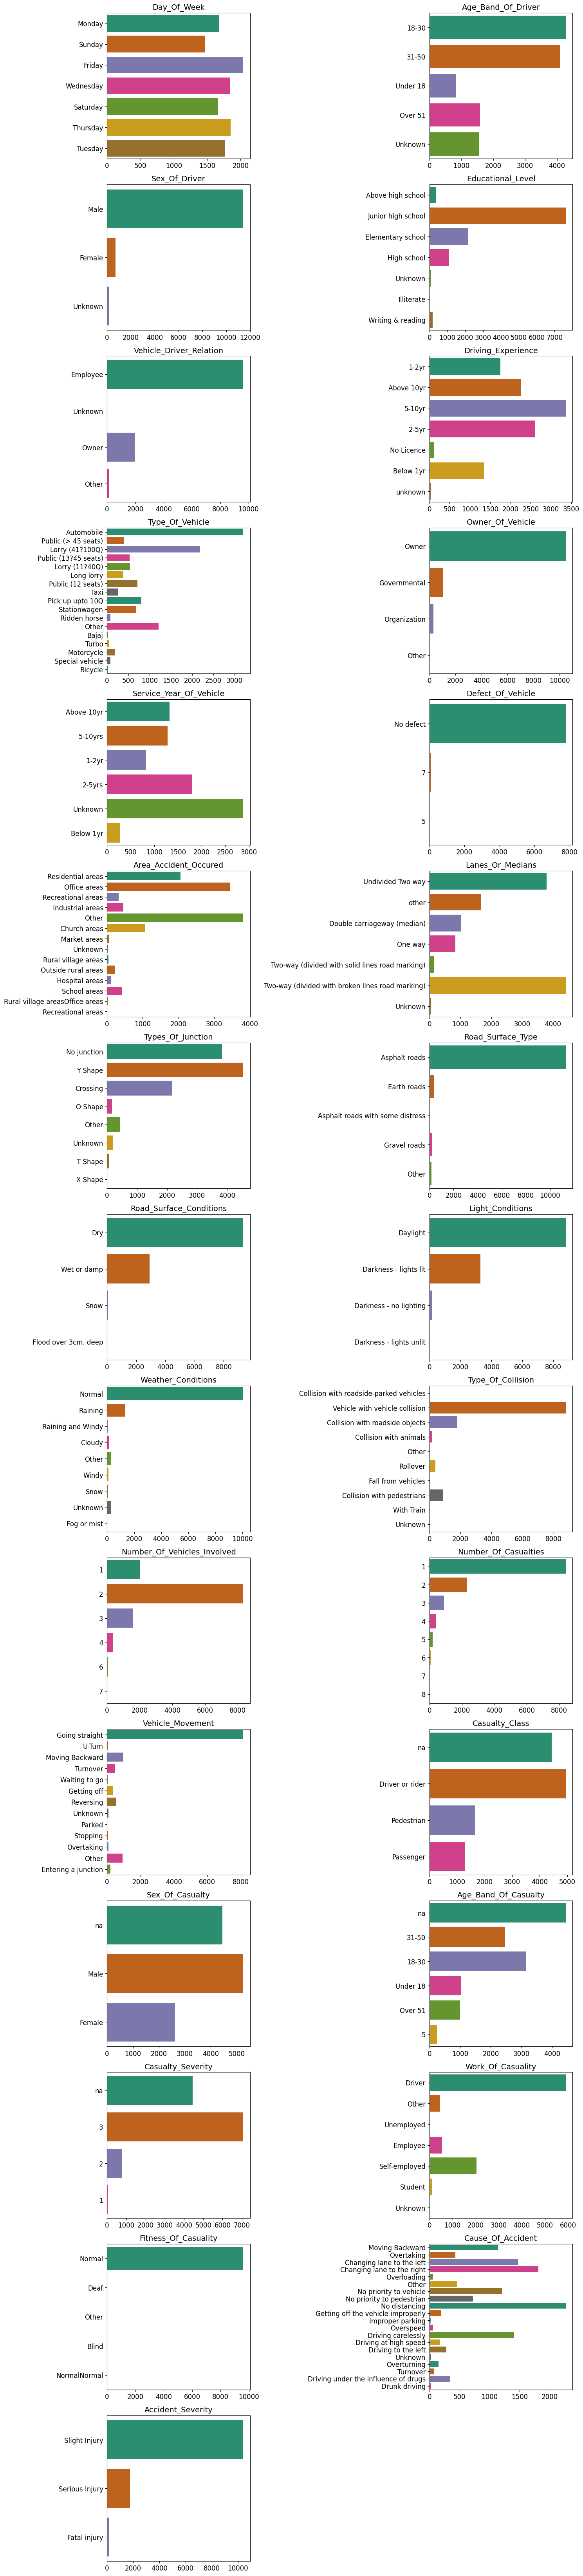

In [ ]:
plt.figure(figsize=(15,70))
plot_no = 1
for col in RTA_data.drop(['hour', 'minute', 'road_allignment', 'pedestrian_movement'], axis=1):
  if plot_no <= RTA_data.shape[1]:
    ax1 = plt.subplot(16,2,plot_no)
    sns.countplot(data=RTA_data, y = col, palette='Dark2')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(col.title(), fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
  plot_no +=1
  plt.tight_layout()

# <font  color="bluelight"><strong>Key observations:

Accidents primarily involved:

• Two vehicles and two casualties

• Occurred on Fridays after noon

Drivers mainly:

• Male, aged 18-30

• Education up to Junior High School, employed

• 5-10 years of driving experience

Accidents predominantly occurred with personally owned passenger vehicles.

Accidents often took place on:

• Two-way lanes

• Straight, flat terrain roads

• Y-shaped junctions

• Asphalt roads

• Daytime

• Under normal weather conditions

# <font color=ligblue>***Hypothesis***<br>**Which of both genders is actually dangerous in driving.? <br>male or female.**

In [ ]:
RTA_data.columns

Index(['day_of_week', 'age_band_of_driver', 'sex_of_driver',
       'educational_level', 'vehicle_driver_relation', 'driving_experience',
       'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle',
       'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians',
       'road_allignment', 'types_of_junction', 'road_surface_type',
       'road_surface_conditions', 'light_conditions', 'weather_conditions',
       'type_of_collision', 'number_of_vehicles_involved',
       'number_of_casualties', 'vehicle_movement', 'casualty_class',
       'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement',
       'cause_of_accident', 'accident_severity', 'hour', 'minute'],
      dtype='object')

In [ ]:
hypothesis_RTA_data = RTA_data.copy(deep=True)

In [ ]:
((hypothesis_RTA_data.groupby(['sex_of_driver']).size()/hypothesis_RTA_data['sex_of_driver'].count())*100)

sex_of_driver
Female      5.691783
Male       92.862943
Unknown     1.445274
dtype: float64

<font color=redyellow>overall extracting the probability of male and female from the dataset, it is found that male probability is 92.8% female probability is 5.69%, and 1.4% unknown person.<br>
********************

### **Crosstab**<br>One of the most useful tools in Pandas for analyzing tabular data is the <strong>*crosstab()*</strong> function. This function allows you to compute a frequency table of two or more variables, which summarizes the distribution of values in the data and provides insights into the relationships between the variables.<br>[more](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)

In [ ]:
A_S_count = pd.crosstab(index=hypothesis_RTA_data['sex_of_driver'].loc[hypothesis_RTA_data['sex_of_driver'] !='Unknown'],
                              columns=RTA_data['accident_severity'], margins=True)
A_S_count

accident_severity  Fatal injury  Serious Injury  Slight Injury    All
sex_of_driver                                                        
Female                        5             104            592    701
Male                        152            1621           9664  11437
All                         157            1725          10256  12138

### Probability

In [ ]:
print("Probability | female | severity = fatal. = " + str((A_S_count.iloc[0,0])/(A_S_count.iloc[0,3]*1.0)*100) + "%")
print("Probability | male   | severity = fatal. = " + str((A_S_count.iloc[1,0])/(A_S_count.iloc[1,3]*1.0)*100) + "%")
print()
print("Probability | female | severity = serious injury. = " + str((A_S_count.iloc[0,1])/(A_S_count.iloc[0,3]*1.0)*100) + "%")
print("Probability | male   | severity = serious injury. = " + str((A_S_count.iloc[1,1])/(A_S_count.iloc[1,3]*1.0)*100) + "%")
print()
print("Probability | female | severity = slight injury. = " + str((A_S_count.iloc[0,2])/(A_S_count.iloc[0,3]*1.0)*100) + "%")
print("Probability | male   | severity = slight injury. = " + str((A_S_count.iloc[1,2])/(A_S_count.iloc[1,3]*1.0)*100) + "%")



Probability | female | severity = fatal. = 0.7132667617689016%
Probability | male   | severity = fatal. = 1.3290198478622017%

Probability | female | severity = serious injury. = 14.835948644793154%
Probability | male   | severity = serious injury. = 14.173297193319925%

Probability | female | severity = slight injury. = 84.45078459343794%
Probability | male   | severity = slight injury. = 84.49768295881788%


## <font color=yellow>Observation<br></font>We applied conditional probability to the dataset obtained using crosstab and the results we got estimate how many injuries were caused by whom.<br>
Fatal injury <br>
0.71 women and 1.32  men. <br>
serious injury <br>
14.83 women and 14.17 men. <br>
Similarly, slight injury <br>
84.45 women and 84.49 men.

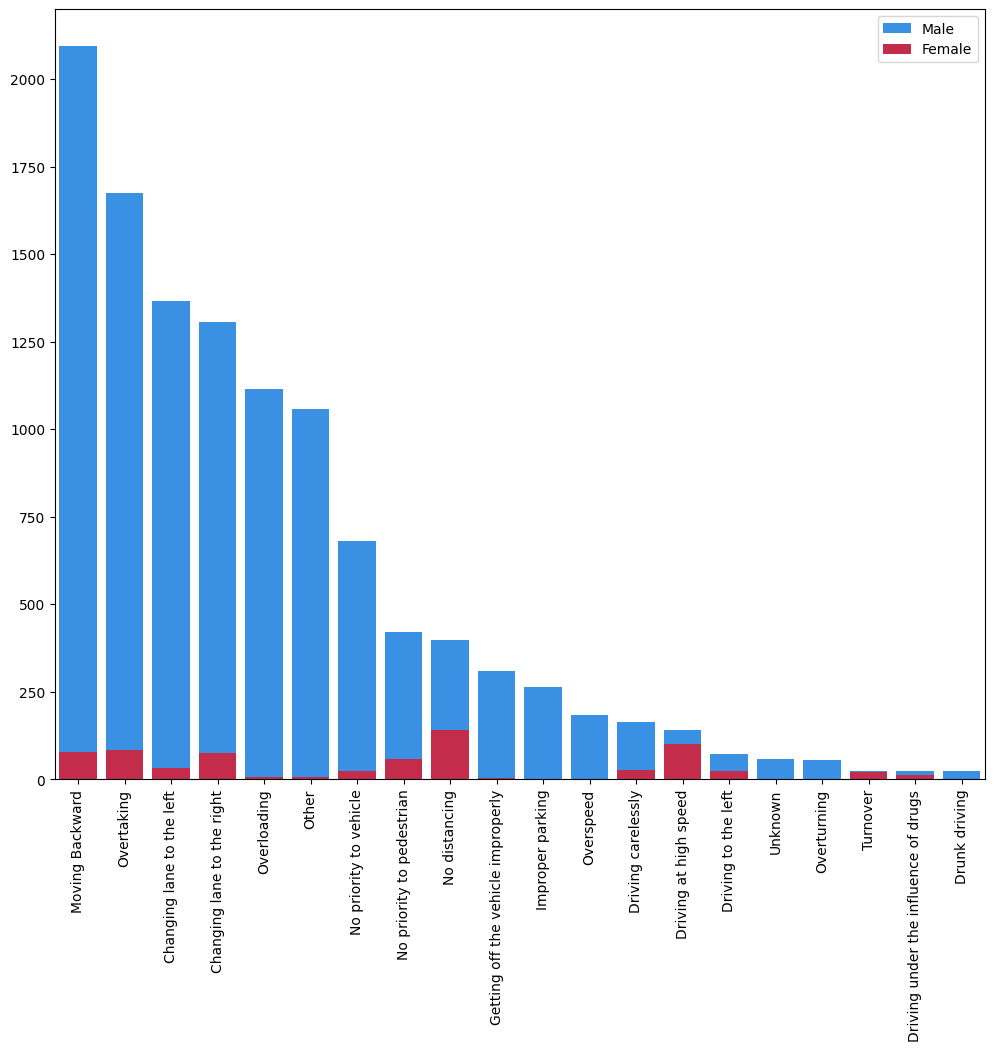

In [ ]:
plt.figure(figsize=(12,10))

male_RTA = hypothesis_RTA_data.loc[hypothesis_RTA_data.sex_of_driver == 'Male']
female_RTA= hypothesis_RTA_data.loc [hypothesis_RTA_data.sex_of_driver == 'Female']
sns.barplot(x= male_RTA.cause_of_accident.unique()[:20], y = male_RTA.cause_of_accident.value_counts().values,color='dodgerblue', label="Male")
sns.barplot(x = female_RTA.cause_of_accident.unique()[:20],y = female_RTA.cause_of_accident.value_counts().values,color='crimson', label="Female")
plt.xticks(rotation=90)
plt.legend()

plt.show()

# <font color=ligblue>***Hypothesis***<br>Since accidents are occurring more frequently on Fridays, is it plausible that they are also happening more frequently on weekends?"

In [ ]:
weekends_acci = pd.crosstab(index=hypothesis_RTA_data ['day_of_week'], columns = hypothesis_RTA_data ['accident_severity'], margins=True)

pd.crosstab(index=hypothesis_RTA_data ['day_of_week'], columns = hypothesis_RTA_data ['accident_severity'], margins=True)

weekends_acci

accident_severity  Fatal injury  Serious Injury  Slight Injury    All
day_of_week                                                          
Friday                       16             313           1712   2041
Monday                       12             204           1465   1681
Saturday                     37             245           1384   1666
Sunday                       35             190           1242   1467
Thursday                     22             272           1557   1851
Tuesday                      17             257           1496   1770
Wednesday                    19             262           1559   1840
All                         158            1743          10415  12316

## <font color=yellow>Observation<br></font>There were no indications of any additional accidents occurring over the weekend.

**************************

## ***Preprocessing***

### <font color=ligblue>**Check the missing value**

In [ ]:
RTA_data.isnull().sum()

time                              0
day_of_week                       0
age_band_of_driver                0
sex_of_driver                     0
educational_level               741
vehicle_driver_relation         579
driving_experience              829
type_of_vehicle                 950
owner_of_vehicle                482
service_year_of_vehicle        3928
defect_of_vehicle              4427
area_accident_occured           239
lanes_or_medians                385
road_allignment                 142
types_of_junction               887
road_surface_type               172
road_surface_conditions           0
light_conditions                  0
weather_conditions                0
type_of_collision               155
number_of_vehicles_involved       0
number_of_casualties              0
vehicle_movement                308
casualty_class                    0
sex_of_casualty                   0
age_band_of_casualty              0
casualty_severity                 0
work_of_casuality           

In [5]:
RTA_data.shape

(12316, 32)

In [6]:
# function returns the column names having more than 50% missing values
def missing_values(df):
    missing_df=pd.DataFrame(100*RTA_data.isnull().sum()/df.shape[0],columns=['% Missing'])
    return missing_df[missing_df['% Missing']>0]

In [ ]:
print(missing_values(RTA_data))

                         % Missing
educational_level         6.016564
vehicle_driver_relation   4.701202
driving_experience        6.731082
type_of_vehicle           7.713543
owner_of_vehicle          3.913608
service_year_of_vehicle  31.893472
defect_of_vehicle        35.945112
area_accident_occured     1.940565
lanes_or_medians          3.126015
road_allignment           1.152972
types_of_junction         7.202014
road_surface_type         1.396557
type_of_collision         1.258525
vehicle_movement          2.500812
work_of_casuality        25.966223
fitness_of_casuality     21.394933


In [ ]:
RTA_data.shape


(12316, 32)

### We are Drop the column from the dataset because these columns do not impact our target column

In [7]:
RTA_data = RTA_data.drop(columns = ['number_of_vehicles_involved', 'vehicle_driver_relation', 'casualty_class', 'casualty_severity'])
RTA_data.shape

(12316, 28)

In [ ]:
RTA_data['accident_severity'].isnull().sum()

0

The "missing" word was added in place of the missing value using the fillna( ) function

In [8]:
RTA_data.fillna('missing', inplace=True)

Again Check the missing value

In [ ]:
RTA_data.isnull().sum()

time                       0
day_of_week                0
age_band_of_driver         0
sex_of_driver              0
educational_level          0
driving_experience         0
type_of_vehicle            0
owner_of_vehicle           0
service_year_of_vehicle    0
defect_of_vehicle          0
area_accident_occured      0
lanes_or_medians           0
road_allignment            0
types_of_junction          0
road_surface_type          0
road_surface_conditions    0
light_conditions           0
weather_conditions         0
type_of_collision          0
number_of_casualties       0
vehicle_movement           0
sex_of_casualty            0
age_band_of_casualty       0
work_of_casuality          0
fitness_of_casuality       0
pedestrian_movement        0
cause_of_accident          0
accident_severity          0
dtype: int64

In [ ]:
RTA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   day_of_week              12316 non-null  object
 1   age_band_of_driver       12316 non-null  object
 2   sex_of_driver            12316 non-null  object
 3   educational_level        12316 non-null  object
 4   driving_experience       12316 non-null  object
 5   type_of_vehicle          12316 non-null  object
 6   owner_of_vehicle         12316 non-null  object
 7   service_year_of_vehicle  12316 non-null  object
 8   defect_of_vehicle        12316 non-null  object
 9   area_accident_occured    12316 non-null  object
 10  lanes_or_medians         12316 non-null  object
 11  road_allignment          12316 non-null  object
 12  types_of_junction        12316 non-null  object
 13  road_surface_type        12316 non-null  object
 14  road_surface_conditions  12316 non-nul

## <font color=magentayellow>**Data Encoding**<br>
this code encodes categorical features in the DataFrame into ordinal integers, where each unique category is mapped to a unique integer value. The function iterates over each specified feature, creates a mapping of unique categories to integers, and replaces the categorical values in the DataFrame with their corresponding integer representations.

In [9]:
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE,SMOTENC,RandomOverSampler
from collections import Counter

In [10]:
def ordinal_encoder(df, feats):
    for feat in feats:
        feat_val = list(np.arange(RTA_data[feat].nunique()))
        feat_key = list(RTA_data[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        RTA_data[feat] = RTA_data[feat].map(feat_dict)
    return df

RTA_data = ordinal_encoder(RTA_data, RTA_data.drop(['accident_severity'], axis=1).columns)
RTA_data.shape

(12316, 28)

<Axes: >

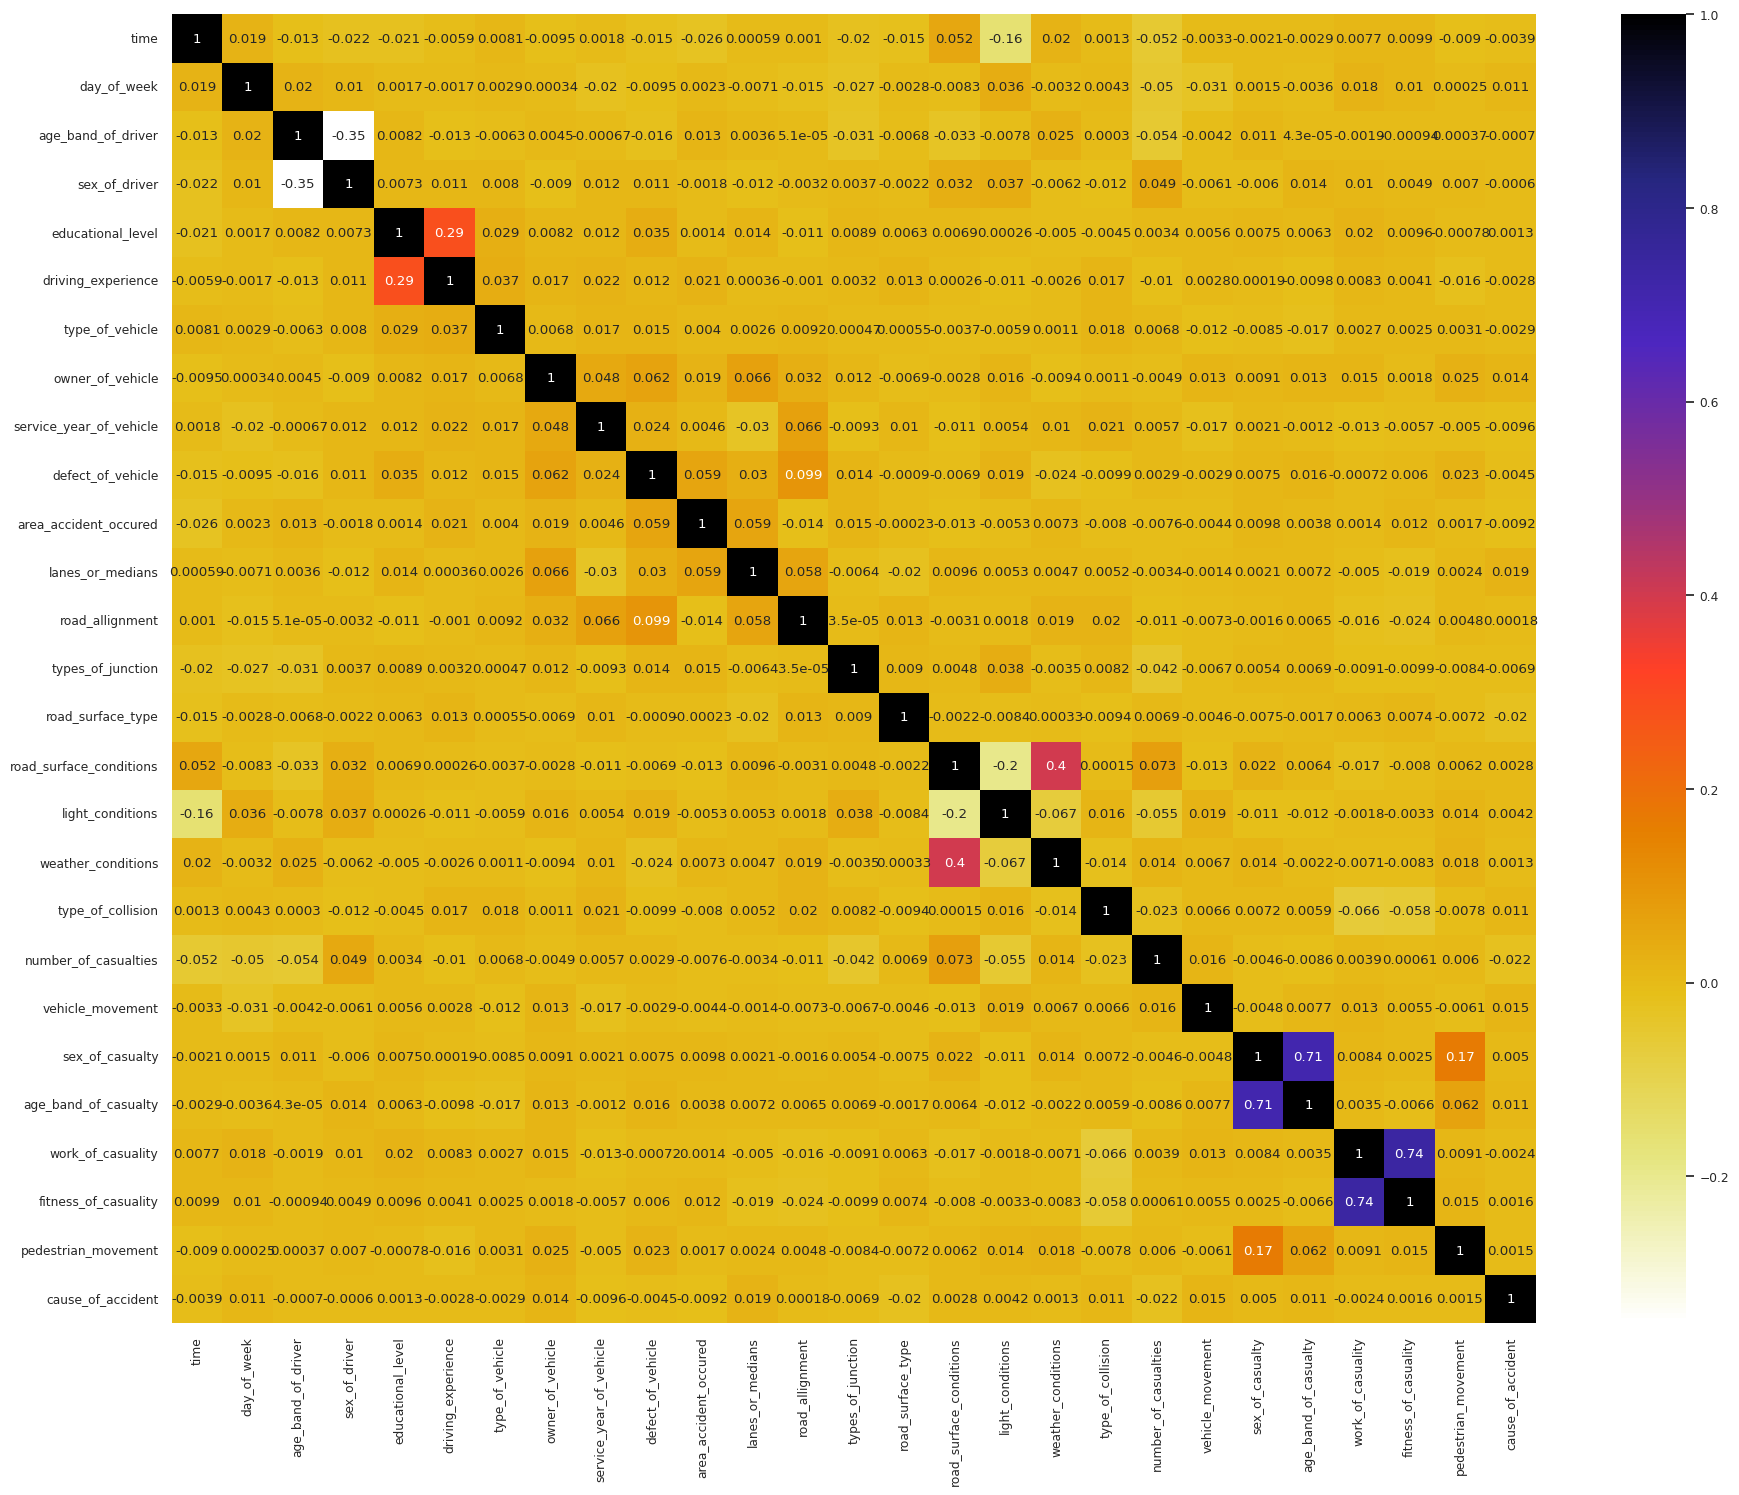

In [ ]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(RTA_data.corr(), annot=True, cmap=plt.cm.CMRmap_r)

## **Data Split**

In [11]:
X = RTA_data.drop('accident_severity', axis=1)
y = RTA_data['accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 27) (3695, 27) (8621,) (3695,)


## <font color=#7EEF34><strong>Check Imbalanced Data<br>
<font color=#34EFCA><strong> What is imbalance data?<br>
those types of datasets where the target class has an uneven distribution of observations.<br>
- Random oversampling
- Under-sampling
- SMOTE (Synthetic Minority Oversampling Technique)<br>
<font color=#34B6EF>There is also another technique. But typically mostly use <font color=#36DADA>***SMOTE***

In [12]:
print('The class Imbalance in the data is given below')

print(RTA_data['accident_severity'].value_counts(),'\n')
print('-'*50, '\n')


The class Imbalance in the data is given below
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: accident_severity, dtype: int64 

-------------------------------------------------- 



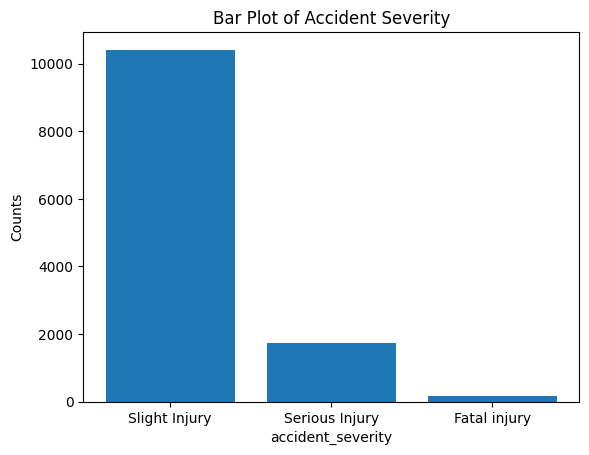

In [ ]:
# put the sum of unique value
accident_counts = pd.Series({'Slight Injury': 10415, 'Serious Injury': 1743, 'Fatal injury':158 })

plt.bar(accident_counts.index, accident_counts.values)

# Adding labels and title
plt.xlabel('accident_severity')
plt.ylabel('Counts')
plt.title('Bar Plot of Accident Severity')

# Customizing x-axis ticks to show original categories
plt.xticks(accident_counts.index, accident_counts.index)

# Show plot
plt.show()

### We can see the data imbalance.

# <font color=53F810>Now we will use the SMOTE technique to balance the data.<br>
## <strong>SMOTE Technique (Synthetic Minority Over-sampling Technique)
<font color=Yellowgreen><strong>SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

In [13]:
oversample = SMOTE()
X_resampled,y_resampled=oversample.fit_resample(X,y)

In [14]:
X_resampled.shape

(31245, 27)

In [ ]:
y_resampled.shape

(31245,)

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=91)

In [ ]:
X_train

time  day_of_week  age_band_of_driver  sex_of_driver  \
10561   251            0                   1              1   
30510   774            2                   2              1   
19302   752            1                   0              1   
29045   349            3                   1              1   
13826  1035            1                   2              1   
...     ...          ...                 ...            ...   
26461   144            1                   0              1   
210     251            0                   1              1   
12138    79            4                   1              1   
1710    124            3                   0              1   
30898   217            2                   2              1   

       educational_level  driving_experience  type_of_vehicle  \
10561                  1                   1                5   
30510                  4                   2                9   
19302                  4                   2                9   
29045                  4                   0                8   
13826                  1                   0                7   
...                  ...                 ...              ...   
26461                  3                   1                4   
210                    4                   0                0   
12138                  4                   2                0   
1710                   1                   0               17   
30898                  4                   5                6   

       owner_of_vehicle  service_year_of_vehicle  defect_of_vehicle  ...  \
10561                 3                        2                  3  ...   
30510                 3                        5                  2  ...   
19302                 3                        3                  2  ...   
29045                 3                        6                  2  ...   
13826                 3                        5                  2  ...   
...                 ...                      ...                ...  ...   
26461                 2                        0                  2  ...   
210                   3                        0                  2  ...   
12138                 0                        2                  2  ...   
1710                  3                        1                  2  ...   
30898                 3                        1                  2  ...   

       weather_conditions  type_of_collision  number_of_casualties  \
10561                   2                  2                     0   
30510                   2                  8                     2   
19302                   3                  8                     0   
29045                   2                  7                     0   
13826                   2                  7                     0   
...                   ...                ...                   ...   
26461                   2                  8                     4   
210                     2                  8                     0   
12138                   2                  8                     2   
1710                    5                  2                     0   
30898                   2                  8                     0   

       vehicle_movement  sex_of_casualty  age_band_of_casualty  \
10561                 2                1                     4   
30510                 2                1                     2   
19302                 2                1                     0   
29045                 2                2                     5   
13826                 2                1                     1   
...                 ...              ...                   ...   
26461                 2                1                     4   
210                   2                1                     3   
12138                 2                1                     2   
1710                  2                1               





# <font color=0BB790><strong>Model Building

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,f1_score, confusion_matrix

In [17]:
print(y_train.shape)
print(X_train.shape)

(21871,)
(21871, 27)


#  <font color='bluewight' ><strong>Training with different Model</font>

In [27]:

def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = {}

    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb'] = {'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred, average='weighted'),
                         'f1_score': f1_score(y_test, y_pred, average='weighted')}
        models['xgb'] = xgb

    if 'knbC' in kwargs.keys() and kwargs['knbC']:
        knbC = KNeighborsClassifier()
        knbC.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = knbC.predict(X_test._get_numeric_data())
        scores['knbC'] = {'accuracy': accuracy_score(y_test, y_pred),
                          'precision': precision_score(y_test, y_pred, average='weighted'),
                          'f1_score': f1_score(y_test, y_pred, average='weighted')}
        models['knbC'] = knbC

    if 'dt' in kwargs.keys() and kwargs['dt']:
        dt = DecisionTreeClassifier()
        dt.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = dt.predict(X_test._get_numeric_data())
        scores['dt'] = {'accuracy': accuracy_score(y_test, y_pred),
                        'precision': precision_score(y_test, y_pred, average='weighted'),
                        'f1_score': f1_score(y_test, y_pred, average='weighted')}
        models['dt'] = dt

    if 'extC' in kwargs.keys() and kwargs['extC']:
        extC = ExtraTreesClassifier()
        extC.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = extC.predict(X_test._get_numeric_data())
        scores['extC'] = {'accuracy': accuracy_score(y_test, y_pred),
                          'precision': precision_score(y_test, y_pred, average='weighted'),
                          'f1_score': f1_score(y_test, y_pred, average='weighted')}
        models['extC'] = extC

    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf'] = {'accuracy': accuracy_score(y_test, y_pred),
                        'precision': precision_score(y_test, y_pred, average='weighted'),
                        'f1_score': f1_score(y_test, y_pred, average='weighted')}
        models['rf'] = rf

    return scores, models


In [28]:
from sklearn.preprocessing import LabelEncoder

L_enc = LabelEncoder()
y_train_encoded = L_enc.fit_transform(y_train)
y_test_encoded = L_enc.transform(y_test)

In [21]:
y_test_encoded.shape

(9374,)

In [29]:
scores,models = modelling(X_train,y_train_encoded, X_test, y_test_encoded, xgb=True, knbC=True, dt=True, extC=True, rf=True)
print(scores)

{'xgb': {'accuracy': 0.9283123533176872, 'precision': 0.9294988155887819, 'f1_score': 0.9281803198673769}, 'knbC': {'accuracy': 0.8088329421804993, 'precision': 0.8478380329283998, 'f1_score': 0.7890681559752318}, 'dt': {'accuracy': 0.8293151269468744, 'precision': 0.8278566184101135, 'f1_score': 0.8274815098389832}, 'extC': {'accuracy': 0.9373799871986345, 'precision': 0.9379292292569859, 'f1_score': 0.9373841388389808}, 'rf': {'accuracy': 0.9244719436739919, 'precision': 0.9249889833465013, 'f1_score': 0.9244381610228133}}


In [30]:

results = {
    'xgb': {'accuracy': 0.9283, 'precision': 0.9294, 'f1_score': 0.9281},
    'knbC': {'accuracy': 0.8088, 'precision': 0.8478, 'f1_score':0.7890},
    'dt': {'accuracy': 0.8293, 'precision': 0.8278, 'f1_score': 0.8274},
    'extC': {'accuracy': 0.9373, 'precision': 0.9379, 'f1_score': 0.9373},
    'rf': {'accuracy': 0.9244, 'precision': 0.9249, 'f1_score': 0.9244}
}

results_df = pd.DataFrame(results)

# Transpose the DataFrame for better visualization
results_df = results_df.T

print(results_df)


      accuracy  precision  f1_score
xgb     0.9283     0.9294    0.9281
knbC    0.8088     0.8478    0.7890
dt      0.8293     0.8278    0.8274
extC    0.9373     0.9379    0.9373
rf      0.9244     0.9249    0.9244


# <font color=blured><strong>Fine Tuning Random Forest<br>
Hyper-parameter tuning plays an important role in optimizing machine learning models for high performance. We examine hyperparameter tuning for a random forest classifier using RandomizedSearchCV.

In [ ]:
RF_FineT_model = RandomForestClassifier()
params={
 'max_depth': [40,50,60],
 'min_samples_leaf': [2],
 'min_samples_split': [10],
 'n_estimators': [100,200,300]}


In [ ]:
final_model=RandomizedSearchCV(RF_FineT_model,param_distributions=params,verbose=1,n_iter=1,scoring='accuracy')
final_model.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=1,
                   param_distributions={'max_depth': [40, 50, 60],
                                        'min_samples_leaf': [2],
                                        'min_samples_split': [10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=1)

In [ ]:
print("Best Model:",final_model.best_estimator_)
print("Score:",final_model.best_score_)

Best Model: RandomForestClassifier(max_depth=60, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300)
Score: 0.8997761212358742


# <font color=F06409> <strong> What is F1 score?<br>
<font color=F0CA09>F1 score is a machine learning evaluation metric that measures a model’s accuracy. It combines the precision and recall scores of a model.

#  <font color='bluewight' >**According to my observation, I got the best results with ExtraTreesClassifier and xgboost model showing the best result**<br>
Model       

XGB =>    PrecisionScore = 0.9294  AccScore = 0.9283  f1_Score = 0.9281

ExtraDT  =>   PrecisionScore = 0.9379  AccScore = 0.9373  f1_Score = 0.9373

******************************

In [33]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.4 MB/s eta 0:00:00


In [ ]:
!pip install evidently

In [34]:
import shap
from sklearn.ensemble import ExtraTreesClassifier

extC = ExtraTreesClassifier()


In [35]:
shap.initjs()

In [36]:
extC.fit(X_train, y_train)

ExtraTreesClassifier()

In [37]:
explainer = shap.Explainer(extC)

In [39]:
sample_set = X_train.sample(10)

shap_values_beeswarm = explainer(sample_set,check_additivity=False)

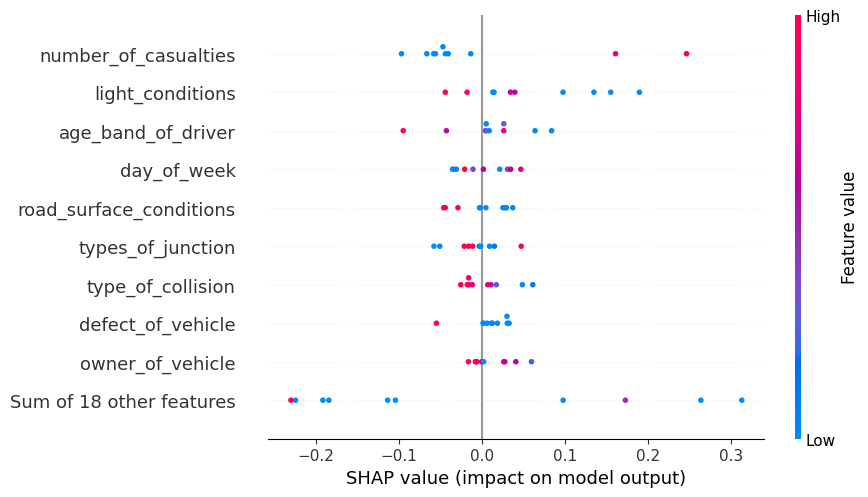

In [40]:
shap.plots.beeswarm(shap_values_beeswarm[:,:,0])

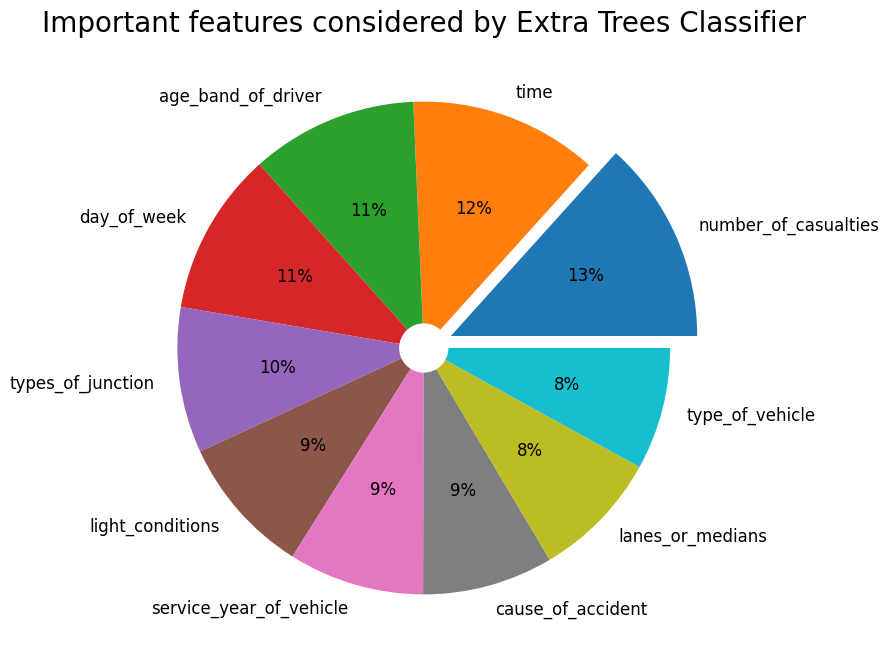

In [41]:
feat_importances = pd.Series(extC.feature_importances_, index=X.columns)
plt.figure(figsize=(8,8))
myexplode = [0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feat_importances.nlargest(10),labels=feat_importances.nlargest(10).index, autopct='%.0f%%',explode= myexplode,
        textprops={'fontsize': 12})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important features considered by Extra Trees Classifier',fontsize=20)
plt.show()